# Samples are row vectors
This notebook points out the fact that `PyTorch` internally represents input `tensor`s as row vectors and gives interpretations to rationalize this choice over the more convention of representing input data as a column vector.

---
tags: mathematics, pytorch, notation, tensors, linear algebra, vectors, matrices

---

In [1]:
import torch
from torch.nn import Linear

import matplotlib.pyplot as plt
%matplotlib inline

## Vectors and linear transformations
In linear algebra, $n$-dimensional vectors are list of $n$ scalars, which can be mapped linearly to $m$-dimensional vectors via matrices represented as list of coefficients and are said to be of size $m\times n$ as they take as inputs $n$-dimensional vectors and returns as outputs $m$-dimensional vectors. This is schematically represented by the conventional notation of writing $A$ to the left of $x$,
$$x\in\mathbb R^n\,,\qquad y = Ax\in\mathbb R^m\,,$$
where $\mathbb R^n$ denotes the space of $n$-dimensional vectors and $\mathbb R^{m\times n}$ denotes the space of $m\times n$-matrices.  

## Compuation in linear algebra
Thinking of a vector as list of numbers, it is customary to write it as $x=(x_1, \dots, x_n)$.  However, for computation purposes, the representation of the action of the linear transformation represented by the matrix $A$ on $x$ as $Ax$ is more consistent when vectors and matrices are represented as arrays of numbers.  

## Vectors as column arrays
In this convention, vectors are represented as columns of numbers and the matrix $A$ is the concatenation of $n$ columns of $m$-dimensional (column) vectors, each representing the image of the basis vectors under the transformation operated by the matrix $A$:
$$x = \begin{bmatrix}x_1\\\vdots\\x_n\end{bmatrix}\in\mathbb R^{n\times 1}\,,\qquad
y = \begin{bmatrix}y_1\\\vdots\\y_m\end{bmatrix}\in\mathbb R^{m\times 1}\,,\qquad
A = \begin{bmatrix}A_{1,1}&\dots&A_{1,n}\\\vdots&\ddots&\vdots\\A_{m,1}&\dots&A_{m,n}
\end{bmatrix}
\in\mathbb R^{m\times n}
$$
and the coefficients of $y$ are calculated from those of $x$ via the entries of $A$ according to the familiar operation
$$y_i = \sum_{j=1}^nA_{i,j}x_j\,.$$
Here, $n$ denotes the dimension of $x$ as well as the numbe of columns in $A$, $m$ denotes the dimension of $y$ as well as the number of columns in $A$, $i$ labels the $i$-th coefficient of $y$ as well as the $i$-th row of $A$, and the sum runs over the coefficients of $x$ via the label $j$.  
 

## Vectors as row arrays
Alternatively, and consistent with the above rules of computation, a vector can be represented by a row vector, in which case the matrix $A$ representing the same linear transformation has its coefficients transposed from those of the earlier notation.  Specifically,
$$x = \begin{bmatrix}x_1&\dots&x_n\end{bmatrix}\in\mathbb R^{1\times n}\,,\qquad
y = \begin{bmatrix}y_1&\dots&y_m\end{bmatrix}\in\mathbb R^{1\times m}\,,\qquad
A = \begin{bmatrix}A_{1,1}&\dots&A_{1,m}\\\vdots&\ddots&\vdots\\A_{n,1}&\dots&A_{n,m}
\end{bmatrix}
\in\mathbb R^{n\times m}
$$
and
$$y_j = \sum_{i=1}^nx_iA_{i,j}\,.$$

## Caveat: dimensions in linear algebra and `shape`s in `PyTorch`
What is referred to as dimensions in linear algebra corresponds to the `shape` of a `tensor` in `PyTorch`.

## Linear algebra in `PyTorch`
While the convention of vectors as column arrays is more standard in linear algebra, it is not the one used in `PyTorch`, as is easily seen when handling `nn.Linear` objects.  
Specifically, while the input and ouput dimensions of a linear (or rather, affine) transformation are specified in this order, e.g. `(n,m)`, internally the linear transformation is represented by a `tensor` of shape `(m,n)`:

In [2]:
linear = Linear(2,3)
print(linear.weight.data.shape)

torch.Size([3, 2])


This indicates that inputs should be row vectors (mathematically), that is, `tensor`s of shape `(1,n)`:

In [3]:
try:
    linear(torch.randn(2,1))
    print("This won't print as this will fail.")
except:
    linear(torch.randn(1,2))
    print("Input is a row vector.")

Input is a row vector.


## Remark: input `tensor`s of shape `(p,n)`
The rules of matrix multiplication allow for matrices $X\in\mathbb R^{p\times n}$ and $A\in\mathbb R^{n\times m}$ to be multiplied in the order $XA$ to produce an output in $\mathbb R^{p\times m}$:
$$X\in\mathbb R^{p\times n}\,,\quad A\in\mathbb R^{n\times m}\,,\qquad Y=XA\in\mathbb R^{p\times m}\,.$$
The matrix $X$ represents the vertical concatenation of $p$ row vectors of dimension $n$, and their outputs are vertically concatenated as the $p$ row vectors in the matrix $Y$ (in the same order).

In [4]:
N = 100
x = torch.randn(N, 2)
y = linear(x)
x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 3]))

Returning to `PyTorch`'s convention of taking inputs as row vectors, below are three possible interpretations or mnemonic of this choice.

## Spreadsheets as `tensor`s
A spreadsheet typically records a collection of feature values for a number of records.  For example, a record could consist of an employee, and the features are their age, salary, or any other numerical data.
It seems more common (although perhaps not universal) to represent this data in a table where each column contains one feature, and each row represents one record.


## Plotting in `matplotlib`
The `plot()` function in `matplotlib.pyplot` draws data one column at a time.  For example, if the data is a single column, then the values will be drawn as a broken line (as the `y`-value, while the `x`-value will be the index in the column):

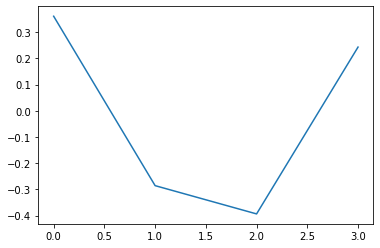

In [5]:
torch.manual_seed(100)
x = torch.randn(4,1)
plt.plot(x);

If the data is a single row, then each value will be drawn individually, and since each column contains exacly one value, they will all be plotted with the same `x`-value, and will only be visible if the `marker` is (noting also that each value will be drawn in a different color):

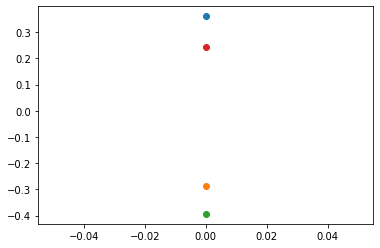

In [6]:
torch.manual_seed(100)
x = torch.randn(1,4)
plt.plot(x, 'o');

This convention in the `plot()` function is consistent with the interpretation as `tensor`s representing spreadsheets.  For example, if the spreadsheet records minimum, maximum, and average temperatures over a numberr of days, then the corresponding `tensor` `x` will have all minimum temperatures in the first column `x[:,0]`; all maximum temperatures in the second column `x[:,1]`; and all average temperatures in the third column `x[:,2]`.  These three timeseries are drawn with a single invocation of the `plot()` function:

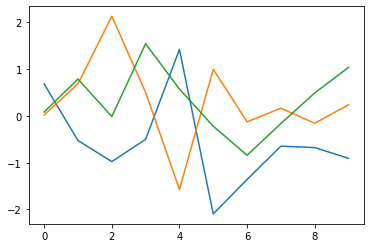

In [7]:
x = torch.randn(10,3) # never mind that this cannot represents min, max, and ave values
plt.plot(x);

## Representation of a layer in a neural network
A linear layer in a neural network is often represented by the diagram:
$$x \rightarrow \fbox{W}\rightarrow y$$
where the input $x$ is on the left and the matrix of weights $W$ is to its right.  This is consistent with the expression for the output, $xW$, where $x$ is to the left and $W$ to its right.